# Exploratory Data Analysis

### 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Better aesthetics for plots
sns.set(style="whitegrid", palette="muted", font_scale=1.2)
plt.rcParams['figure.figsize'] = (12, 6)

### 2. Load Data

In [2]:
airBnb_df = pd.read_csv('D:\Codeveda Tech\AB_NYC_2019_cleaned.csv')

#Quick look at the data
print(airBnb_df.shape)
print(airBnb_df.dtypes)
airBnb_df.head()

(48895, 16)
id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,Lisaroxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### 3. Summary Statistics

In [3]:
#select numerical columns
numerical_columns = airBnb_df.select_dtypes(include=[np.number])
print(numerical_columns.describe())

                 id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       48895.000000   
mean         7.029962          23.274466           1.090910   
std         20.510550          44.550582           1.597283   
min          1.000000           0.00

### 4. Visualize Data

Histogram

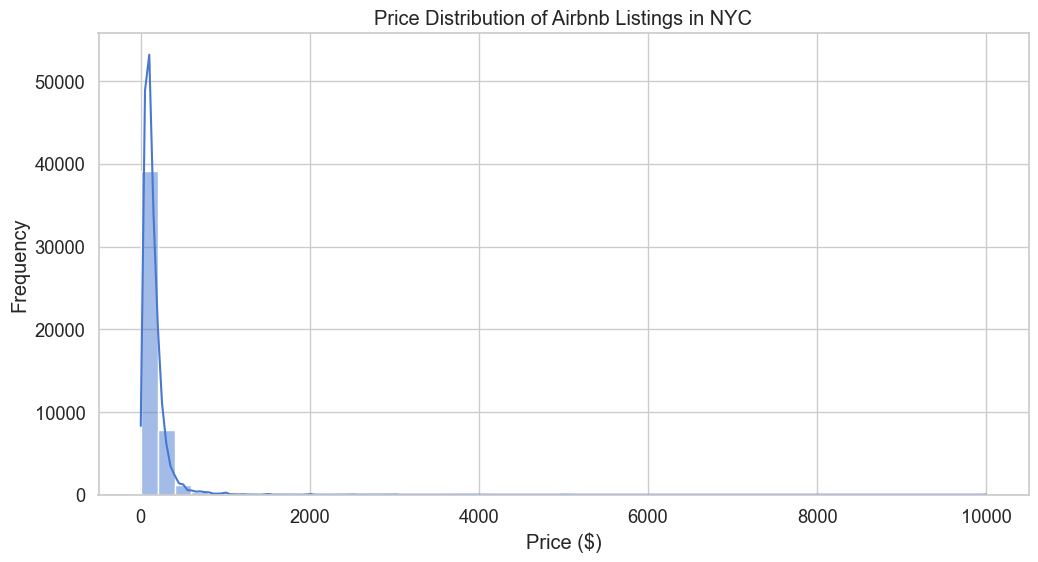

In [9]:
#Price distribution
sns.histplot(airBnb_df['price'], bins=50, kde=True)
plt.title('Price Distribution of Airbnb Listings in NYC')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show()

 **Interpretation of the price distribution plot**

The histogram shows that the majority of Airbnb listings in NYC have prices clustered at the lower end, with a long tail towards higher prices. This indicates that while most listings are relatively affordable, there are a few listings with very high prices, which skews the distribution. The distribution is right-skewed, suggesting the presence of outliers or luxury listings. Most hosts set prices below $500 per night.


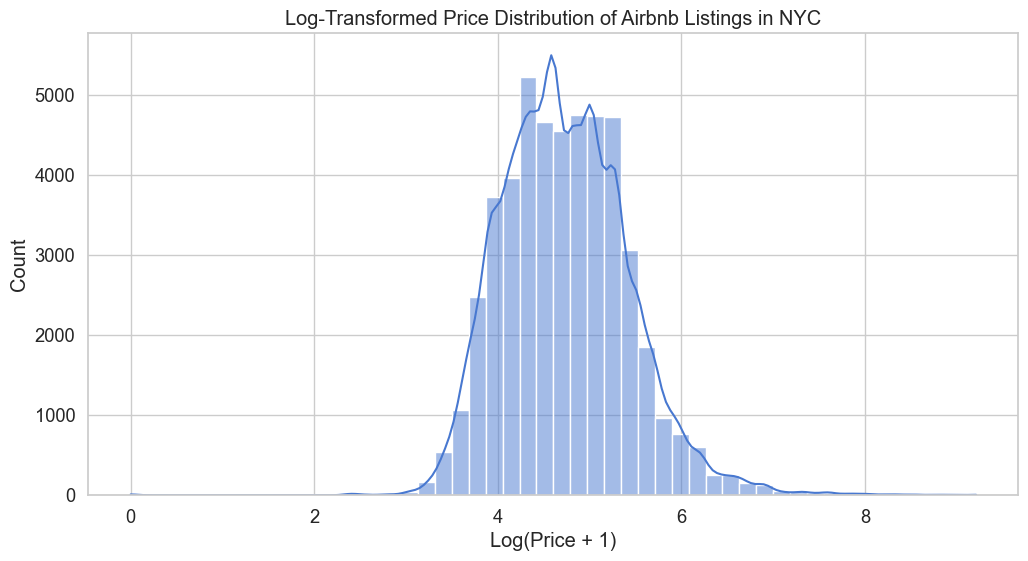

In [10]:
#Log transformation if skewed
sns.histplot(np.log1p(airBnb_df['price']), bins=50, kde=True)
plt.title('Log-Transformed Price Distribution of Airbnb Listings in NYC')
plt.xlabel('Log(Price + 1)')
plt.show()

The log-transformed price distribution plot shows a more symmetric, bell-shaped curve compared to the original price distribution.This indicates that the log transformation effectively reduces the right skewness caused by high-priced outliers. Most listings are concentrated around the lower to mid price range, and the transformation helps in visualizing the spread and central tendency of prices more clearly. This normalization is useful for further statistical analysis and modeling.


**Boxplot**

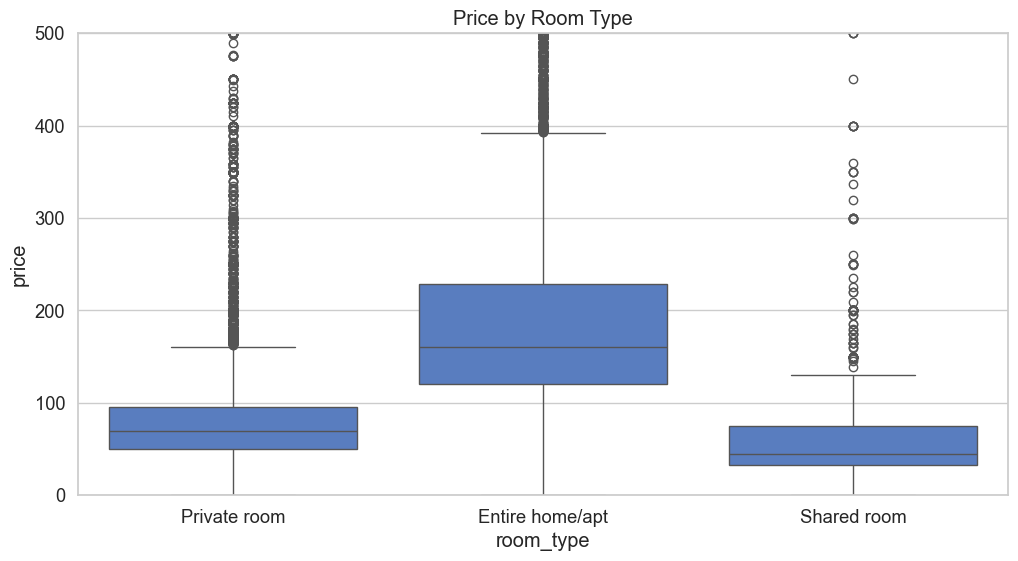

In [12]:
sns.boxplot(x="room_type", y="price", data=airBnb_df)
plt.ylim(0, 500)  # limit extreme values
plt.title("Price by Room Type")
plt.show()

The boxplot of price by room type shows that "Entire home/apt" listings generally have higher prices compared to "Private room" and "Shared room" listings. The median price for "Entire home/apt" is significantly above that of the other room types, and there is a wider spread of prices, indicating more variability and the presence of high-priced outliers. "Private room" prices are lower and more tightly clustered, while "Shared room" listings have the lowest prices and the least variability. The plot also reveals that all room types have some outliers, but these are most prominent for "Entire home/apt" listings.

**Scatterplot**

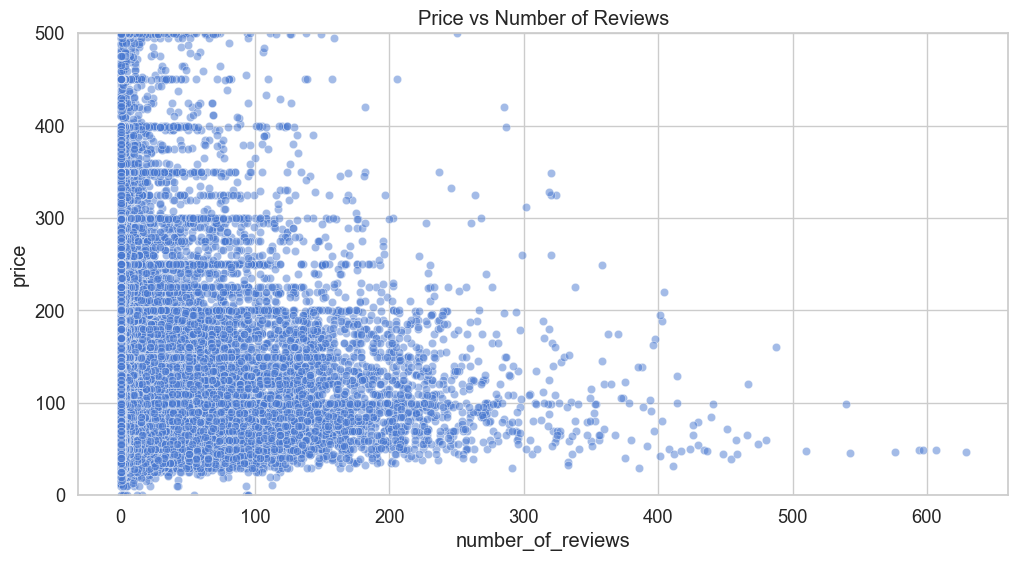

In [13]:
#Price against number of reviews
sns.scatterplot(x="number_of_reviews", y="price", data=airBnb_df, alpha=0.5)
plt.title("Price vs Number of Reviews")
plt.ylim(0, 500)
plt.show()

The scatterplot of price vs number of reviews shows that most Airbnb listings in NYC have both low prices and a relatively low number of reviews. There is a dense cluster of points at the lower end of both axes, indicating that affordable listings tend to receive more reviews. As the price increases, the number of reviews generally decreases, suggesting that higher-priced listings are less frequently reviewed. There are a few outliers with high prices or a large number of reviews, but these are rare. Overall, the plot suggests a negative relationship between price and number of reviews, with most activity concentrated among lower-priced listings.

### 5. Correlation between numerical features

                                      id   host_id  latitude  longitude  \
id                              1.000000  0.588290 -0.003125   0.090908   
host_id                         0.588290  1.000000  0.020224   0.127055   
latitude                       -0.003125  0.020224  1.000000   0.084788   
longitude                       0.090908  0.127055  0.084788   1.000000   
price                           0.010619  0.015309  0.033939  -0.150019   
minimum_nights                 -0.013224 -0.017364  0.024869  -0.062747   
number_of_reviews              -0.319760 -0.140106 -0.015389   0.059094   
reviews_per_month               0.180221  0.209783 -0.018758   0.138516   
calculated_host_listings_count  0.133272  0.154950  0.019517  -0.114713   
availability_365                0.085468  0.203492 -0.010983   0.082731   

                                   price  minimum_nights  number_of_reviews  \
id                              0.010619       -0.013224          -0.319760   
host_id         

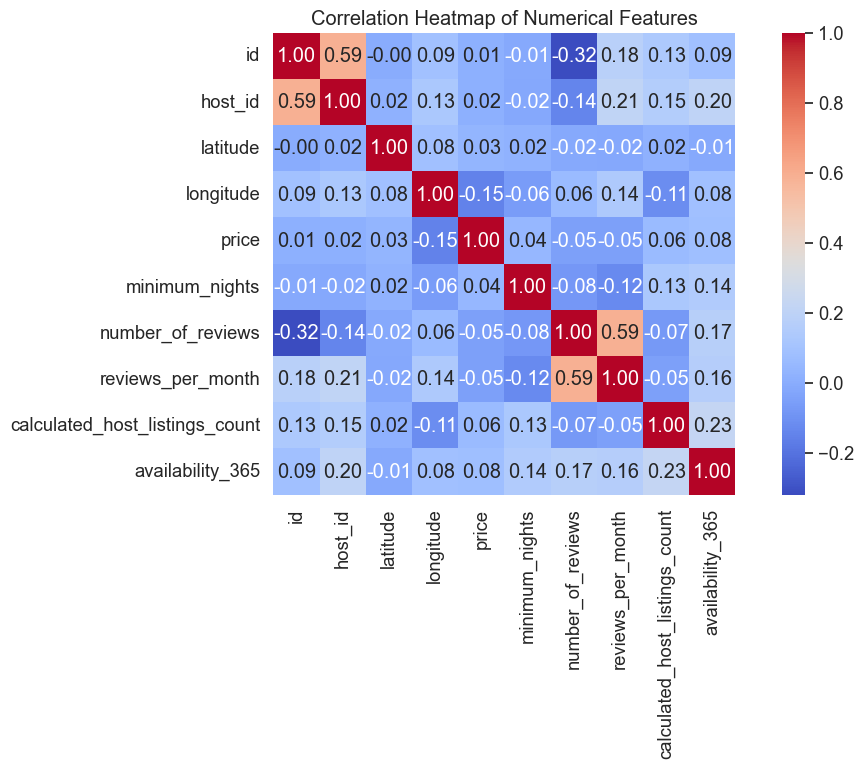

In [14]:
correlation = numerical_columns.corr()
print(correlation)
# Heatmap of correlations
sns.heatmap(correlation, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

The correlation heatmap shows the relationships between the numerical features in the Airbnb NYC dataset. Most correlations are weak, with values close to zero, indicating little linear relationship between most pairs of variables. Notable observations include:

- A strong positive correlation (0.59) between `number_of_reviews` and `reviews_per_month`, which is expected since more reviews per month generally lead to a higher total number of reviews.
- `calculated_host_listings_count` and `availability_365` also show a moderate positive correlation (0.23), suggesting that hosts with more listings tend to have higher availability.
- `price` has weak correlations with other features, indicating that price is not strongly linearly related to the other numerical variables in the dataset.
- Negative correlations, such as between `number_of_reviews` and `id` (-0.32), are likely not meaningful for analysis.

Overall, the heatmap suggests that most numerical features are relatively independent, with only a few moderate relationships.